In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

In [2]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.datasets import imdb

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features,
                                                      test_split=0.2)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
20000 train sequences
5000 test sequences
Pad sequences (samples x time)
X_train shape: (20000, 80)
X_test shape: (5000, 80)


In [4]:
X_train[0]

array([  360,     7,    19,   396,    17,    26,   269,   929,    18,
        1769,   493,     6,   116,     7,   105,     5,   575,   182,
          27,     5,  1002,  1085,   130,    62,    17,    24,    89,
          17,    13,   381,  1421,     8,  5167,     7,     5,  2723,
          38,   325,     7,    17,    23,    93,     9,   156,   252,
          19,   235,    20,    28,     5,   104,    76,     7,    17,
         169,    35, 14764,    17,    23,  1460,     7,    36,  2184,
         934,    56,  2134,     6,    17,   891,   214,    11,     5,
        1552,     6,    92,     6,    33,   256,    82,     7], dtype=int32)

In [5]:
X_train[1000]

array([   56,  5646,   157,     7,   275,     5,   219,   604,    10,
        4783,     5,  4783,   164,    24,    36,   760,   214,    11,
         115,    86,  2432,    75,    11,    20,     7,   730,   267,
          13,   257,     5,   718,   265,   761,    19,    40,   143,
         129,     6,     8,    21,    13,   671,   162,     7, 12711,
           6,   102,    10,   918,    23,   185,   431,  2594,     6,
          19,    40,    11,   412, 14602,    68,    19,    40,   179,
          67,    11,   153,    58,    20,     2,  4621,   761,     7,
         835,     6,  3303,   146,   447,    18,   902,     7], dtype=int32)

In [9]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen, dropout=0.2))
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Build model...
____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
embedding_1 (Embedding)            (None, 80, 128)     2560000     embedding_input_1[0][0]          
____________________________________________________________________________________________________
lstm_1 (LSTM)                      (None, 128)         131584      embedding_1[0][0]                
____________________________________________________________________________________________________
dense_4 (Dense)                    (None, 1)           129         lstm_1[0][0]                     
____________________________________________________________________________________________________
activation_4 (Activation)          (None, 1)           0           dense_4[0][0]                    
Total params: 2691713
______________________________________________________

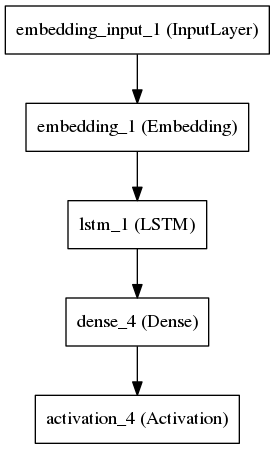

In [12]:
from IPython.display import Image
from keras.utils.visualize_util import plot

plot(model, to_file='model.png')
Image('model.png')

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
print(X_train.shape)
print(y_train.shape)
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=15,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


In [ ]:
print(score, acc)